In [51]:
import numpy as np
import cv2
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

%matplotlib inline

In [2]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

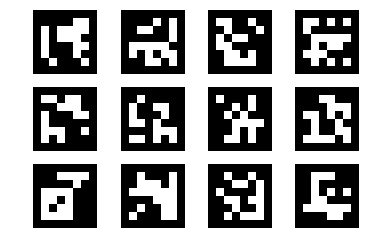

In [3]:

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

# plt.savefig("_data/markers.pdf")
plt.show()

In [108]:
frame = cv2.imread('senior/IMG_9508.JPG')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

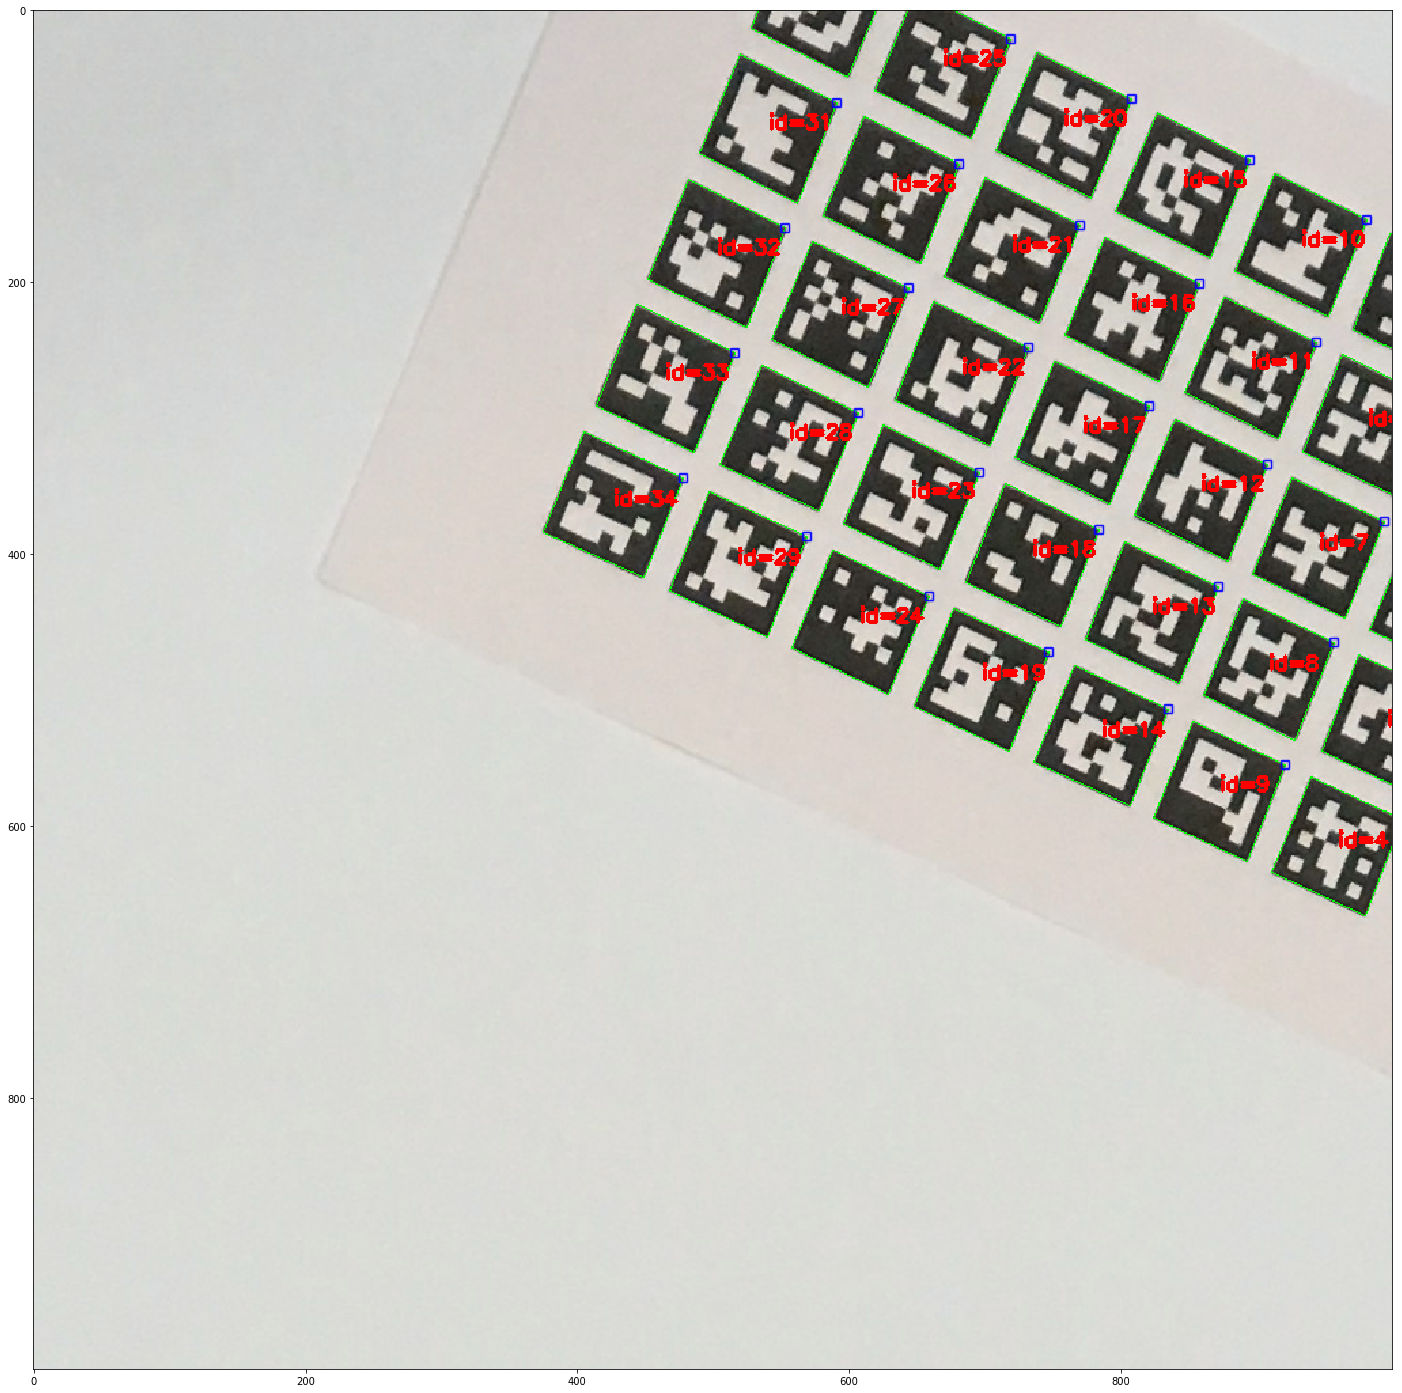

In [110]:
plt.figure(figsize=(25,25))
plt.imshow(frame_markers[1000:2000,1000:2000])
plt.show()

In [29]:
corners[0]
#x,y from top left and go clockwise

array([[[1728., 2749.],
        [1754., 2820.],
        [1685., 2852.],
        [1658., 2780.]]], dtype=float32)

In [115]:
XIMG_NAME = 'senior/IMG_9516.JPG'
YIME_NAME = 'senior/IMG_9517.JPG'
ximg = cv2.imread(XIMG_NAME)
yimg = cv2.imread(YIME_NAME)

In [116]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

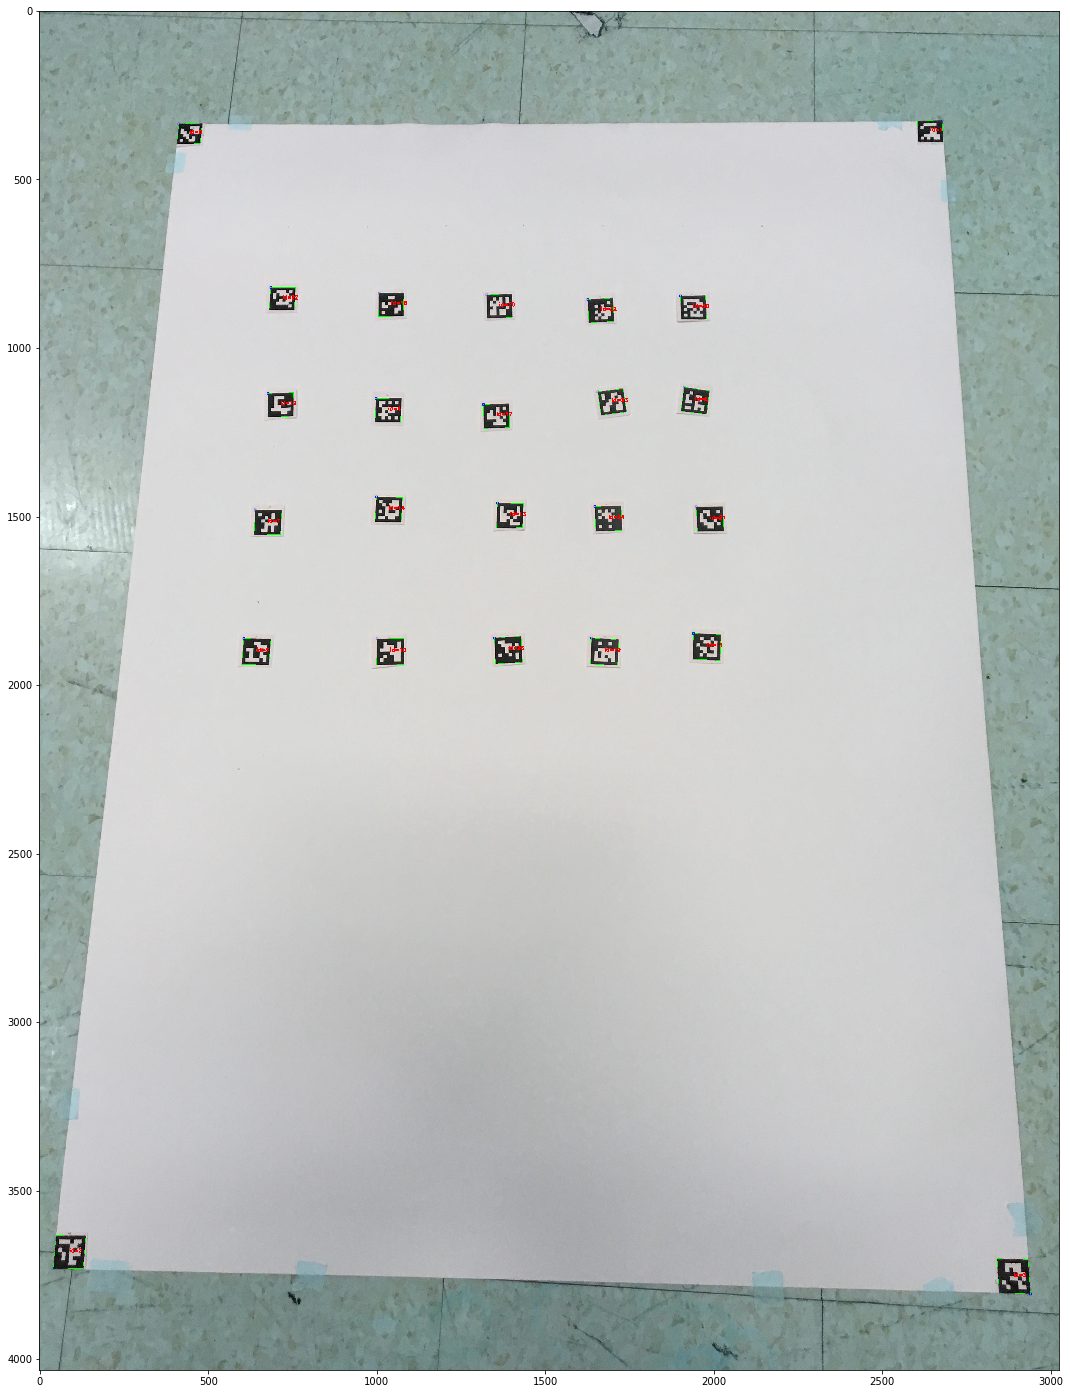

In [200]:
frame = ximg
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
parameters =  aruco.DetectorParameters_create()
corners, idx, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
# print(corners,idx)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, idx)
plt.figure(figsize=(25,25))
plt.imshow(frame_markers)
plt.show()
arucox = {}
for i in range(idx.shape[0]):
    tmp = corners[i][0][0][0]
    corners[i][0][0][0] = corners[i][0][0][1]
    corners[i][0][0][1] = tmp
    tmp = corners[i][0][3][0]
    corners[i][0][3][0] = corners[i][0][3][1]
    corners[i][0][3][1] = tmp
    arucox[idx[i][0]] = corners[i]

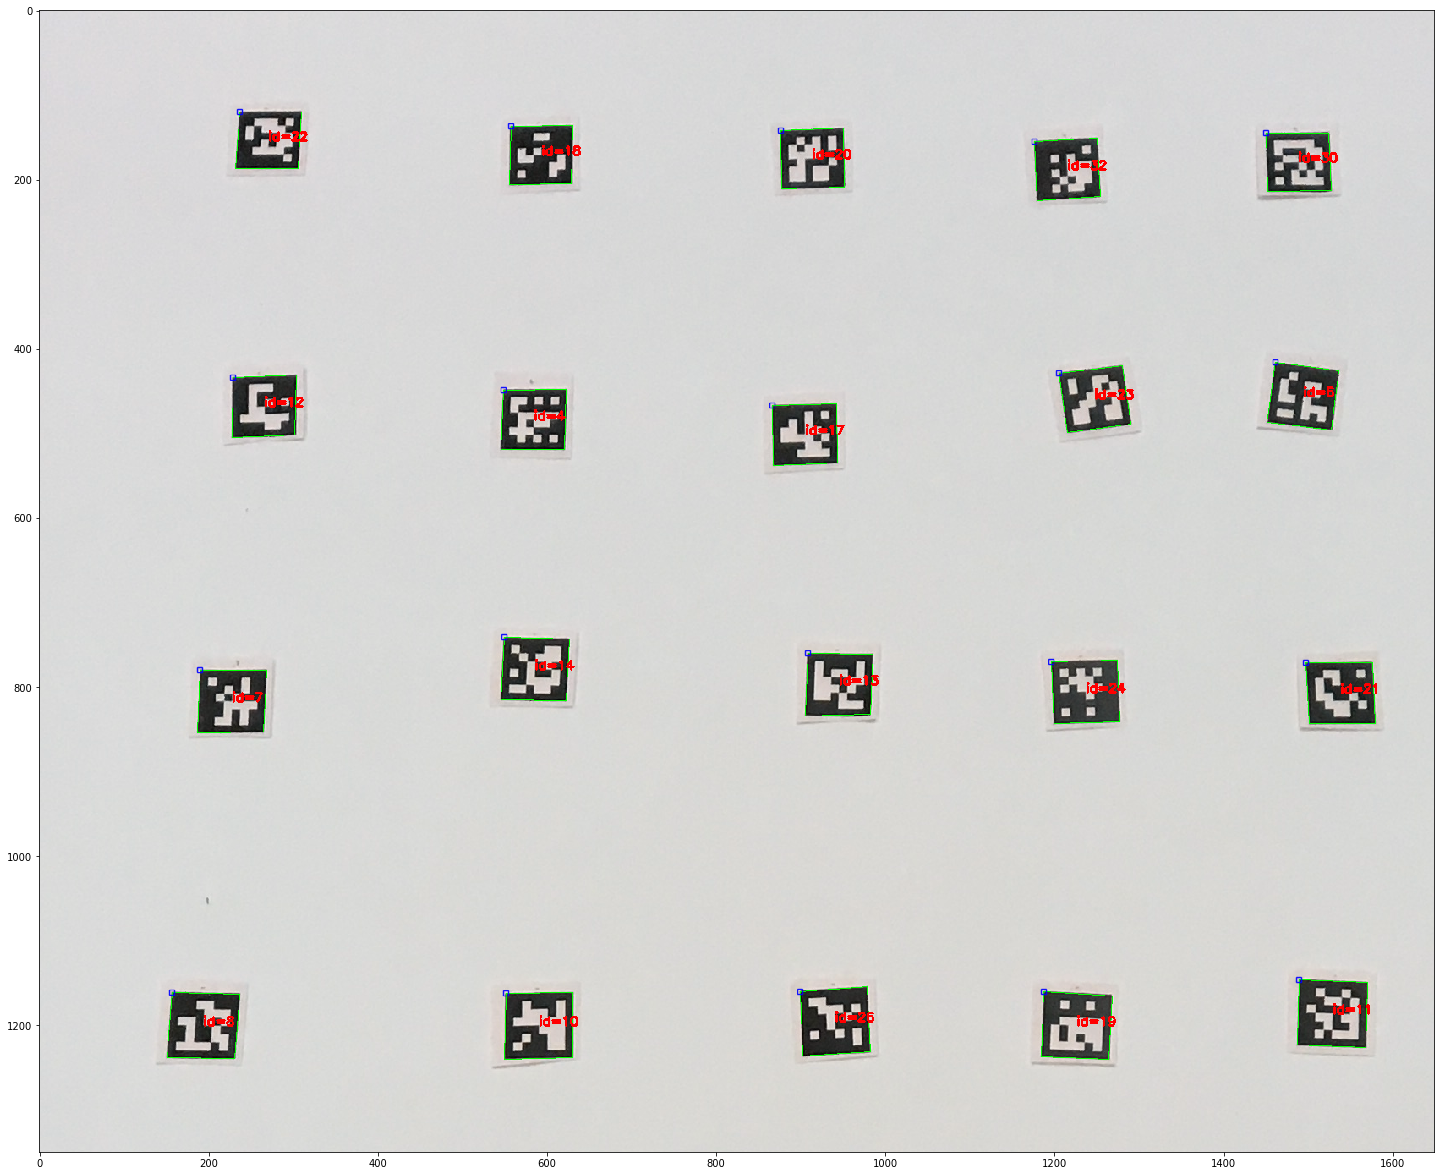

In [183]:
# print(arucox[0])
plt.figure(figsize=(25,25))
plt.imshow(frame_markers[700:2050,450:2100])
plt.show()

In [ ]:
print(arucox[0])
plt.figure(figsize=(5,5))
plt.imshow(frame_markers[300:450,350:500])
plt.show()

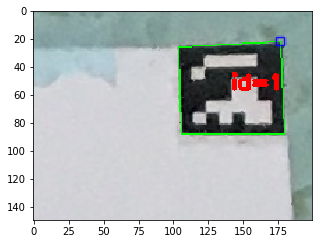

In [135]:
# frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
plt.figure(figsize=(5,5))
plt.imshow(frame_markers[300:450,2500:2700])
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(frame_markers[300:450,350:500])
plt.show()

In [138]:
frame = yimg
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
parameters =  aruco.DetectorParameters_create()
corners, idy, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
arucoy = {}
for i in range(idy.shape[0]):
    tmp = corners[i][0][0][0]
    corners[i][0][0][0] = corners[i][0][0][1]
    corners[i][0][0][1] = tmp
    tmp = corners[i][0][3][0]
    corners[i][0][3][0] = corners[i][0][3][1]
    corners[i][0][3][1] = tmp
    arucoy[idy[i][0]] = corners[i]

In [139]:
corner = [0,1,2,3]
tl_x = arucox[0][0][0]
tr_x = arucox[1][0][0]
bl_x = arucox[2][0][0]
br_x = arucox[3][0][0]
tl_y = arucoy[0][0][0]
tr_y = arucoy[1][0][0]
bl_y = arucoy[2][0][0]
br_y = arucoy[3][0][0]

In [175]:
arucox.keys()

dict_keys([10, 8, 3, 2, 30, 0, 19, 26, 11, 7, 21, 24, 13, 14, 17, 4, 12, 23, 6, 32, 20, 18, 22, 1])

In [181]:
idx[:,0]

array([10,  8,  3,  2, 30,  0, 19, 26, 11,  7, 21, 24, 13, 14, 17,  4, 12,
       23,  6, 32, 20, 18, 22,  1], dtype=int32)

In [182]:
idy[:,0]

array([26, 21, 24, 13, 14, 23,  3, 12, 32, 18,  1,  0,  2, 19, 10,  8, 11,
        7, 17,  6,  4, 30, 20, 22], dtype=int32)

In [141]:
def drawline(p1,p2,pic,color=[255,0,0]):
    [y1,x1] = p1
    [y2,x2] = p2
    #y = mx + c
    if x1==x2:
        for i in range(pic.shape[0]):
            pic[i,x1] = np.array(color,dtype="uint8")
        return
    if y1==y2:
        for i in range(pic.shape[1]):
            pic[y1,i] = np.array(color,dtype="uint8")
        return
    m = (y1-y2)/(x1-x2)
    c = y1-m*x1
#      = -c/m 
#     lastx = (pic.shape[0]-1-c)/m
    if abs(m) <= 1:
        for i in range(pic.shape[1]):
            yy = int(m*i+c)
            if yy < 0 or yy >= pic.shape[0]:
                continue
            for k1 in range(-2,3):
                for k2 in range(-2,3):
                    if 0 <= yy+k1 and yy+k1 < pic.shape[0] and 0 <= i+k2 and i+k2 < pic.shape[1]:
                        pic[yy,i] = np.array(color,dtype="uint8")
    else:
        for i in range(pic.shape[0]):
            xx = int((i-c)/m)
            if xx < 0 or xx >= pic.shape[1]:
                continue
            for k1 in range(-2,3):
                for k2 in range(-2,3):
                    if 0 <= i+k1 and i+k1 < pic.shape[0] and 0 <= xx+k2 and xx+k2 < pic.shape[1]:
                        pic[i,xx] = np.array(color,dtype="uint8")

In [204]:
inf = float('inf')

def getline(p1,p2):
    [y1,x1] = p1
    [y2,x2] = p2
    #y = mx + c
    if x1==x2:
        return [inf,x1]
    if y1==y2:
        return [0,inf]
    m = (y1-y2)/(x1-x2)
    c = y1-m*x1
    return [m,c]

def divline(p1,p2,ratio): #ratio in (0,1) close to p1 1 is p1
#     print(p1)
    [y1,x1] = p1
    [y2,x2] = p2
    rratio = 1-ratio
    x = int(x1*rratio + x2*ratio)
    y = int(y1*rratio + y2*ratio)
    return [y,x]

def sratio(l,r,p,tl,tr,bl,br,isprint=False):
    while True:
        mid = (l+r)/2
        p1 = divline(tl,tr,mid)
        p2 = divline(bl,br,mid)
        [m,c] = getline(p1,p2)
#         drawline(p1,p2,frame_markers)
#         plt.figure(figsize=(15,15))
#         plt.imshow(frame_markers)
#         plt.show()
        if m == inf:
            if abs(c-p[1]) < 0.5:
#                 plt.figure(figsize=(15,15))
#                 plt.imshow(frame_markers)
#                 plt.show()
                return mid
            if c > p[1]:
                r = mid
                continue
#                 return sratio(l,mid,p,tl,tr,bl,br)
            l = mid
            continue
#             return sratio(mid,r,p,tl,tr,bl,br)
        x = (p[0]-c)/m
#         print(abs(x-p[1]),l,r,mid)
        if abs(x-p[1]) < 0.5:
#             plt.figure(figsize=(15,15))
#             plt.imshow(frame_markers)
#             plt.show()
            return mid
        if x > p[1]:
            r = mid
            continue;
#             return sratio(l,mid,p,tl,tr,bl,br)
        l = mid
        
#         return sratio(mid,r,p,tl,tr,bl,br)

        
def sratioy(l,r,p,tl,tr,bl,br,isprint=False):
    while True:
       
        mid = (l+r)/2
        
        p1 = divline(tl,bl,mid)
        p2 = divline(tr,br,mid)
#         [x1,y1] = p1
#         [x2,y2] = p2
        p11 = [p1[1],p1[0]]
        p22 = [p2[1],p2[0]]
        drawline(p1,p2,frame_markers)
        [m,c] = getline(p11,p22)
        if m == inf:
            if abs(c-p[0]) < 0.5:
                return mid
            if c > p[0]:
                r = mid
                continue
            l = mid
            continue
#             return sratio(mid,r,p,tl,tr,bl,br)
        y = (p[1]-c)/m
        
        if(isprint):
            print(l,mid,r)
            print(y,p[0])
            plt.figure(figsize=(15,15))
            plt.imshow(frame_markers)
            plt.show()
        if abs(y-p[0]) < 0.5:
            return mid
        if y > p[0]:
            r = mid
            continue;
        l = mid

In [202]:
mid = 0.5
p1 = divline(tl_x,tr_x,mid)
p2 = divline(bl_x,br_x,mid)
print(tl_x)
print(tr_x)
print(p1)
print(bl_x)
print(br_x)
print(p2)

[334. 414.]
[ 322. 2677.]
[328, 1545]
[3731.   41.]
[3806. 2939.]
[3768, 1490]


In [206]:
pos = {}
H = 10990
W = 7905
for x in arucox:
    if x in corner:
        continue
#     print(arucox[x])
    isprint = False
#     print('x')
    ratiox = sratio(0,1,arucox[x][0][0],tl_x,tr_x,bl_x,br_x,isprint)
#     print('a',end=' ')
    ratiox3 = sratio(0,1,arucox[x][0][3],tl_x,tr_x,bl_x,br_x,isprint)
#     print('b',end=' ')
    ratioy = sratioy(0,1,arucoy[x][0][0],tl_y,tr_y,bl_y,br_y,isprint)
#     print('c',end=' ')
    ratioy3 = sratioy(0,1,arucoy[x][0][3],tl_y,tr_y,bl_y,br_y,isprint)
#     print('d',end=' ')
    #print(ratioy,ratioy3)
    theta = math.atan((ratiox-ratiox3)/(ratioy-ratioy3)*W/H)
    pos[x] = str(ratioy*H) + ' ' + str(ratiox*W) + ' ' + str(theta)
    print(x,pos[x])

10 564.793701171875 234.4866943359375 0.03059854324941143
8 566.13525390625 111.93603515625 -0.0
30 206.0625 517.607666015625 0.014829639891927912
19 561.573974609375 431.918701171875 -0.030927351195112095
26 562.647216796875 342.369873046875 0.0631502281072855
11 556.207763671875 525.71337890625 -0.0473902229392978
7 438.687744140625 112.322021484375 0.04587992545620357
21 431.443359375 529.959228515625 0.031263300229991506
24 431.711669921875 433.8486328125 0.03160662546613791
13 428.76025390625 341.597900390625 -0.007818213134866154
14 423.9306640625 226.573974609375 -0.0
17 325.1923828125 325.00048828125 0.04637255479783622
4 319.021240234375 220.7841796875 0.015141795611021039
12 314.99658203125 115.7958984375 0.06049789613943887
23 310.971923828125 435.778564453125 0.1354520599306946
6 306.41064453125 519.923583984375 -0.1383283723284443
32 209.81884765625 425.742919921875 0.029652760035251177
20 204.720947265625 325.00048828125 0.04446285786317426
18 202.8427734375 217.696289062

In [169]:
##write file
filename = 'aruco.txt'
file = open(filename,'w')
for x in pos:
    txt = str(x) + ' ' + pos[x] + '\n'
    file.write(txt)
file.close()